In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
# load housing index and inflation index
hmi = pd.read_excel(r"*\House Price Index Publication.xlsx")
infl = pd.read_excel(r"*\RBIB Table No. 18 Consumer Price Index (Base 2010=100).xlsx") 

In [125]:
hmi.head()

,Date,Ahmedabad,Bangalore,Chennai,Delhi,Jaipur,Kanpur,Kochi,Kolkata,Lucknow,Mumbai,All India
0,2010-04-01,93.218679,98.639697,102.731254,100.721966,95.312154,91.735054,89.611743,77.879138,88.820870,90.626706,94.239884
1,2010-07-01,102.542630,97.902562,109.501643,95.560697,99.047963,99.446163,92.376464,103.191573,98.671878,99.717032,99.811033
2,2010-10-01,101.990310,97.935658,94.647711,92.105168,103.574958,103.686822,113.849679,106.617769,104.745752,100.879902,99.404514
3,2011-01-01,102.248381,105.522082,93.119392,112.058101,102.064925,105.131960,104.162114,112.311520,107.761499,108.776360,106.632290
4,2011-04-01,121.296551,110.679615,101.157996,126.819484,106.272775,104.676173,120.865986,103.030474,118.001952,122.091899,115.987161


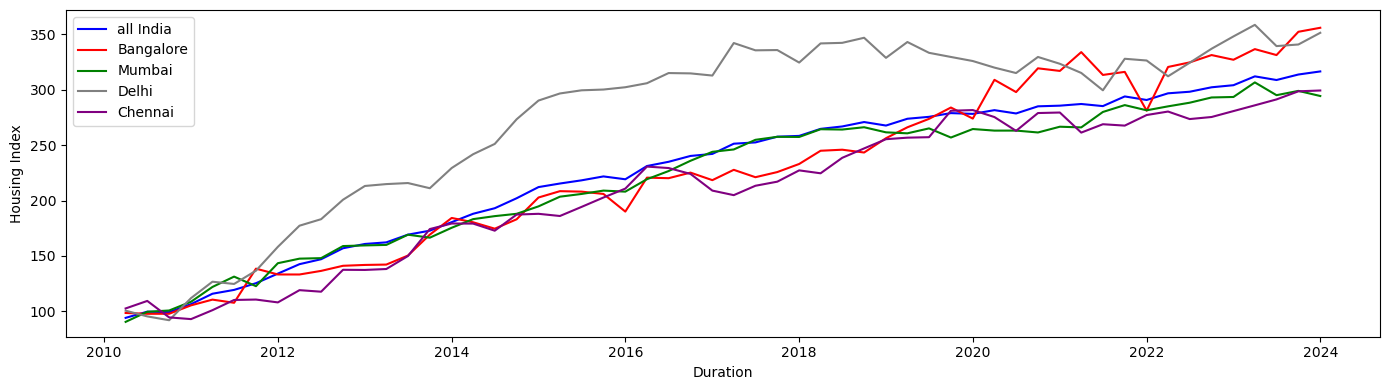

In [120]:
#plot the graph for major city housing index and compare with Indian average

plt.figure(figsize=(14,4))
plt.plot( hmi["Date"], hmi["All India"],linestyle ="-", color="blue", label ="all India")
plt.plot( hmi["Date"], hmi["Bangalore"],linestyle ="-", color="red", label="Bangalore")
plt.plot(hmi["Date"], hmi["Mumbai"], linestyle ="-", color="green", label="Mumbai")
plt.plot(hmi["Date"], hmi["Delhi"],  linestyle ="-", color="grey", label="Delhi")
plt.plot(hmi["Date"], hmi["Chennai"],  linestyle ="-", color="purple", label="Chennai")
plt.xlabel("Duration")
plt.ylabel("Housing Index")
plt.legend()
plt.tight_layout()
plt.show()

In [126]:
infl.tail()

,Date,Unnamed: 1,Unnamed: 2,Group,Index,Inflation (%)
3802,JAN-2013,NaN,NaN,A.6.2) Health,104.0,NaN
3803,JAN-2013,NaN,NaN,A.6.3) Transport and communication,103.2,NaN
3804,JAN-2013,NaN,NaN,A.6.4) Recreation and amusement,103.1,NaN
3805,JAN-2013,NaN,NaN,A.6.5) Education,103.6,NaN
3806,JAN-2013,NaN,NaN,A.6.6) Personal Care and Effects,104.5,NaN


In [55]:
infl1 = infl[infl["Group"]=="A) General Index"] # select only row containing general index of inflation
infl1.dtypes

Date              object
Unnamed: 1       float64
Unnamed: 2       float64
Group             object
Index            float64
Inflation (%)    float64
dtype: object

In [59]:
infl1 = infl1[["Date", "Index", "Inflation (%)"]]
infl1.tail()

,Date,Index,Inflation (%)
3668,MAY-2013,106.9,NaN
3696,APR-2013,106.1,NaN
3724,MAR-2013,105.5,NaN
3752,FEB-2013,105.3,NaN
3780,JAN-2013,104.6,NaN


In [85]:
#from string column create date column

def get_month(x):
    lists = ["JAN","FEB","MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
    for i in range(len(lists)):
        if x==lists[i]:
            return i+1

infl1["Month"] = infl1["Date"].apply(lambda x: x.split("-")[0])
infl1["Year"] = infl1["Date"].apply(lambda x: x.split("-")[1]).astype(str)
infl1["Month1"] = infl1["Month"].apply(lambda x: get_month(x)).astype(str)
infl1["Date1"] = infl1["Year"].astype(str) + "-" + infl1["Month1"].astype(str) + "-" + "01"
infl1["Date1"] = pd.to_datetime(infl1['Date1'], format='%Y-%m-%d')

infl1.head()

,Date,Index,Inflation (%),Month,Year,Month1,Date1
0,APR-2024,186.7,4.83,APR,2024,4,2024-04-01
28,MAR-2024,185.8,4.85,MAR,2024,3,2024-03-01
56,FEB-2024,185.8,5.09,FEB,2024,2,2024-02-01
84,JAN-2024,185.5,5.10,JAN,2024,1,2024-01-01
112,DEC-2023,185.7,5.69,DEC,2023,12,2023-12-01


In [100]:
#combine both housing index and inflation

combined = pd.merge(hmi, infl1, left_on="Date", right_on="Date1",how="inner").sort_values(by="Date_x", ascending=True)

combined.head()

,Date_x,Ahmedabad,Bangalore,Chennai,Delhi,Jaipur,Kanpur,Kochi,Kolkata,Lucknow,Mumbai,All India,Date_y,Index,Inflation (%),Month,Year,Month1,Date1
0,2013-01-01,155.005510,141.935596,137.430064,213.105559,129.374972,90.869091,124.201191,169.406345,166.174440,159.526678,160.840570,JAN-2013,104.6,NaN,JAN,2013,1,2013-01-01
1,2013-04-01,161.939424,142.266366,138.262897,214.792921,129.374972,82.368581,127.032028,171.805695,173.924629,159.975323,162.277914,APR-2013,106.1,NaN,APR,2013,4,2013-04-01
2,2013-07-01,171.696804,150.373377,149.975688,215.743205,128.015404,92.027102,161.579703,173.542470,186.665846,169.187186,169.235124,JUL-2013,111.0,NaN,JUL,2013,7,2013-07-01
3,2013-10-01,172.645068,169.256843,174.276161,211.073738,127.296565,81.630456,189.355676,168.193157,203.552537,166.502128,172.810613,OCT-2013,114.8,NaN,OCT,2013,10,2013-10-01
4,2014-01-01,169.374224,184.285621,179.266495,229.292316,119.965459,78.352654,166.221603,169.780932,212.483680,175.449164,180.492826,JAN-2014,113.6,8.6,JAN,2014,1,2014-01-01


In [112]:
#create QoQ and YoY rate for national inflation and banglore housing rate index

combined["inflation_QoQ"] = (combined["Index"]/combined["Index"].shift(1)-1)*100
combined["Bangalore_QoQ"] = (combined["Bangalore"]/combined["Bangalore"].shift(1)-1)*100
combined["inflation_YoY"] = (combined["Index"]/combined["Index"].shift(4)-1)*100
combined["Bangalore_YoY"] = (combined["Bangalore"]/combined["Bangalore"].shift(4)-1)*100
combined["mean"] = 0
combined.tail(20)

,Date_x,Ahmedabad,Bangalore,Chennai,Delhi,Jaipur,Kanpur,Kochi,Kolkata,Lucknow,...,Month,Year,Month1,Date1,index_lag,inflation_QoQ,Bangalore_QoQ,mean,inflation_YoY,Bangalore_YoY
25,2019-04-01,264.129783,265.984875,256.636334,342.842644,161.500000,164.855802,287.670217,266.500000,370.688474,...,APR,2019,4,2019-04-01,139.6,1.146132,3.840209,0,2.990518,8.635075
26,2019-07-01,262.835676,273.578562,257.067807,333.096351,177.338061,166.000000,278.991757,275.108021,371.850731,...,JUL,2019,7,2019-07-01,141.2,2.124646,2.854932,0,3.147353,11.307886
27,2019-10-01,282.324877,283.800000,280.900000,329.372864,175.549430,171.400000,280.600000,266.545431,392.000000,...,OCT,2019,10,2019-10-01,144.2,2.080444,3.736198,0,4.619758,16.671005
28,2020-01-01,276.147552,273.838539,281.500000,325.702053,172.812360,172.500000,264.973880,272.400000,395.500000,...,JAN,2020,1,2020-01-01,147.2,2.038043,-3.510029,0,7.593123,6.906270
29,2020-04-01,278.396853,308.756307,275.211040,319.776680,172.618764,170.389700,271.521090,270.921318,396.236967,...,APR,2020,4,2020-04-01,150.2,0.798935,12.751225,0,7.223796,16.080400
30,2020-07-01,286.529643,297.717816,262.762483,314.869849,172.599272,171.138591,270.128327,268.111943,397.495419,...,JUL,2020,7,2020-07-01,151.4,1.651255,-3.575147,0,6.726768,8.823518
31,2020-10-01,272.981577,319.133454,278.825358,329.372864,170.975685,170.533610,258.906155,280.038432,398.100000,...,OCT,2020,10,2020-10-01,153.9,2.923977,7.193267,0,7.608696,12.450125
32,2021-01-01,284.119750,316.779651,279.300000,323.224572,166.673695,171.300000,286.216113,276.792909,398.400000,...,JAN,2021,1,2021-01-01,158.4,-1.325758,-0.737561,0,4.061252,15.681179
33,2021-04-01,302.779372,333.736102,261.200000,314.970303,167.146608,169.200000,287.317554,283.952942,394.900000,...,APR,2021,4,2021-04-01,156.3,0.959693,5.352759,0,4.227213,8.090457
34,2021-07-01,302.555274,313.169021,268.743022,299.319098,181.161158,171.049585,297.215513,278.667958,395.540488,...,JUL,2021,7,2021-07-01,157.8,2.978454,-6.162678,0,5.588044,5.189883


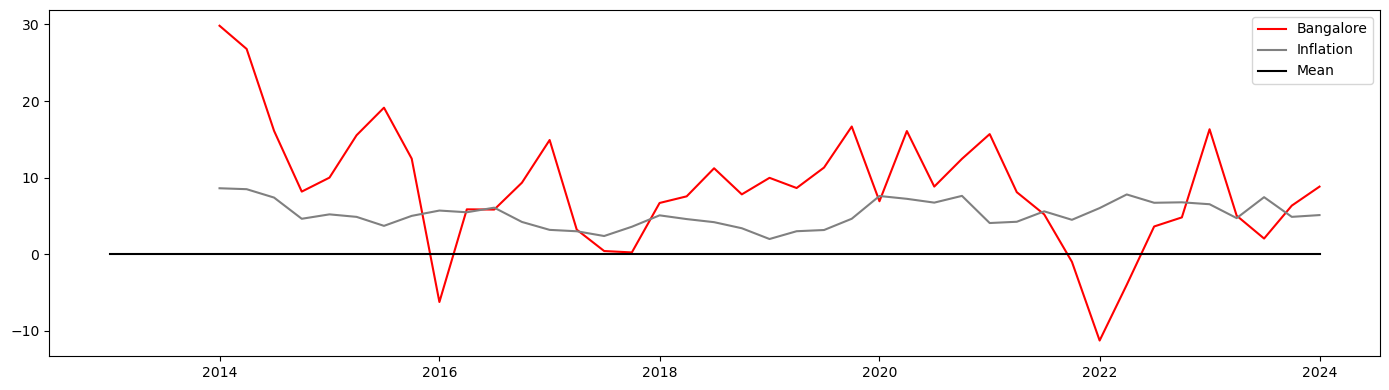

In [121]:
# create graph showing increase in house cost in bangalore comapre to inflation

plt.figure(figsize=(14,4))
plt.plot(combined["Date_x"], combined["Bangalore_YoY"],linestyle ="-", color="red", label="Bangalore")
plt.plot(combined["Date_x"], combined["inflation_YoY"], linestyle= "-", color = "Grey", label = "Inflation")
plt.plot(combined["Date_x"], combined["mean"], linestyle= "-", color = "black", label = "Mean")
plt.legend()
plt.tight_layout()
plt.show()